In [1]:
import config as cf
from DISClib.ADT import list as lt
from DISClib.ADT import map as mp
from DISClib.DataStructures import mapentry as me
from DISClib.Algorithms.Sorting import mergesort as ms
from DISClib.ADT import orderedmap as om
from datetime import datetime as dt, date
import model
import csv
assert model


In [2]:
def initCatalog():
    return model.newCatalog()

# Funciones para la carga de datos
def loadData(catalog, file):
    input_file = csv.DictReader(open(file, encoding="utf-8"),
                                delimiter=",")
    for avist in input_file:
        model.addAvist(catalog, avist)
    return catalog

In [3]:
catalog = initCatalog()
loadData(catalog,cf.data_dir.replace("\\App","")+"/UFOS/UFOS-utf8-small.csv")
print()

# Requerimiento 1 #

1. Se calcula el size del arbol rbt que tiene como llaves las ciudades donde sucedieron avistamiento $O(1)$
2. Se recorren todas las llaves del arbol y se agrega a una lista la llave y el valor $O(n)$
3. Se busca el maximo de la lista creada en el paso 2 $O(n)$
4. Se revisa si el arbol contiene la ciudad pasa por parametro $O(log(n))$

Si la contiene:

5. Se hace get de la ciudad en el arbol $O(log(n))$
6. Se calcula el size de los values de esa ciudad $O(1)$
7. Se ordena los values de esa ciudad $O(k\cdot log(k))$
   
Si la lista es menor que 6 elementos:

8. Se retorna los valores pedidos y los values ordenados ya que no se puede hacer los primero 3 y ultimos 3
   
Si la lsita tiene 6 o mas elementos:

9. Se hace sublist de los primer 3 elementos y ultimos 3 $O(1)$
10. Se retorna todo lo pedido y los primero 3 y ultimos 3

Si no la contiene:

11. Se retorna False

Total = $O(n + k\cdot log(k))$, depende de los datos

In [23]:
def keyValueSet(root, klist):
    if root is not None:
        keyValueSet(root['left'], klist)
        lt.addLast(klist, (root["key"],lt.size(root['value'])))
        keyValueSet(root['right'], klist)

def countSightingsCity(catalog, city):
    totalCiudades = om.size(catalog["city"])

    all = lt.newList("ARRAY_LIST")
    keyValueSet(catalog["city"]["root"], all)
    key = None
    most = 0
    for i in lt.iterator(all):
        if i[1] > most:
            key = i[0]
            most = i[1]

    if om.contains(catalog["city"], city):
        vals = om.get(catalog["city"], city)
        numCity = lt.size(me.getValue(vals))
        ordered = ms.sort(me.getValue(vals), lambda x,y: x["datetime"] < y["datetime"])
        if lt.size(ordered) < 6:
            return (totalCiudades, (key,most), numCity, False, ordered)
        else:
            first3 = lt.subList(ordered,1,3)
            last3 = lt.subList(ordered, lt.size(ordered)-2,3)
            return (totalCiudades, (key,most), numCity, True, first3, last3)


city = "las vegas"
req1 = countSightingsCity(catalog, city)
req1

(679,
 ('phoenix', 8),
 7,
 True,
 {'elements': [{'datetime': datetime.datetime(1998, 12, 5, 20, 30),
    'city': 'las vegas',
    'state': 'nv',
    'country': 'us',
    'shape': 'unknown',
    'duration (seconds)': 10.0,
    'duration (hours/min)': '10 seconds',
    'comments': 'Bright light shining directionally out of a cloudy shape or object&#44 got bright and smoky and then disappered.',
    'date posted': '1999-01-28 00:00:00',
    'latitude': 36.175,
    'longitude': -115.1363889},
   {'datetime': datetime.datetime(1999, 7, 19, 21, 30),
    'city': 'las vegas',
    'state': 'nv',
    'country': 'us',
    'shape': 'oval',
    'duration (seconds)': 600.0,
    'duration (hours/min)': '5-10min.',
    'comments': 'Two round bright white ufo&#39s were sighted on National airlines jet N7 316 Boeing 757 time 21;30 hrs just outside Las Vegas&#44Nevada one h',
    'date posted': '1999-08-10 00:00:00',
    'latitude': 36.175,
    'longitude': -115.1363889},
   {'datetime': datetime.dateti

In [24]:
from prettytable import PrettyTable
import prettytable as pt

In [25]:
#View Req 1
table = PrettyTable()
print(f"{'='*10} Req No. 1 Inputs {'='*10}")
print(f"UFO Sightings in the city of: {city}",end="\n\n")
print(f"{'='*10} Req No. 1 Answers {'='*10}")
print(f"There are {req1[0]} different cities with UFO sightings...")
print(f"The city with most UFO sightings is: {req1[1][0]} with {req1[1][1]}",end="\n\n")
print(f"There are {req1[2]} sightings at the: {city} city.")
if req1[3]:
    print("The first 3 and last 3 UFO sightings in the city are:")
    table.field_names = ["datetime", "city", "state", "country", "shape", "duration (seconds)"]
    table.align = "c"
    table.hrules = pt.ALL
    for i in lt.iterator(req1[4]):
        vals = []
        for j in table.field_names:
            vals.append(i[j])
        table.add_row(vals)
    for i in lt.iterator(req1[5]):
        vals = []
        for j in table.field_names:
            vals.append(i[j])
        table.add_row(vals)
    print(table)



========== Req No. 1 Inputs ==========
UFO Sightings in the city of: las vegas

========== Req No. 1 Answers ==========
There are 679 different cities with UFO sightings...
The city with most UFO sightings is: phoenix with 8

There are 7 sightings at the: las vegas city.
The first 3 and last 3 UFO sightings in the city are:
+---------------------+-----------+-------+---------+-----------+--------------------+
|       datetime      |    city   | state | country |   shape   | duration (seconds) |
+---------------------+-----------+-------+---------+-----------+--------------------+
| 1998-12-05 20:30:00 | las vegas |   nv  |    us   |  unknown  |        10.0        |
+---------------------+-----------+-------+---------+-----------+--------------------+
| 1999-07-19 21:30:00 | las vegas |   nv  |    us   |    oval   |       600.0        |
+---------------------+-----------+-------+---------+-----------+--------------------+
| 2000-01-07 16:20:00 | las vegas |   nv  |    us   |  unknown  |

In [26]:
import pandas as pd

In [27]:
df = pd.read_csv(r"C:\Users\camil\OneDrive\Desktop\Los Andes\5to Semestre\EDA\Retos\Reto3-G08\Data\UFOS\UFOS-utf8-small.csv")

df[df.city == "las vegas"].sort_values(by="datetime").iloc[[0,1,2,-3,-2,-1]]

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
123,1998-12-05 20:30:00,las vegas,nv,us,unknown,10.0,10 seconds,Bright light shining directionally out of a cl...,1999-01-28 00:00:00,36.175,-115.136389
71,1999-07-19 21:30:00,las vegas,nv,us,oval,600.0,5-10min.,Two round bright white ufo&#39s were sighted o...,1999-08-10 00:00:00,36.175,-115.136389
318,2000-01-07 16:20:00,las vegas,nv,us,unknown,600.0,10 min.,hypersonic arcraft entering Nevada Test Site a...,2000-01-22 00:00:00,36.175,-115.136389
268,2006-10-15 08:30:00,las vegas,nv,us,circle,1200.0,20 minutes,White Balls and Bright Light in the Vegas mori...,2006-10-30 00:00:00,36.175,-115.136389
471,2007-03-04 11:00:00,las vegas,nv,us,circle,660.0,11:00,One day&#44as i was looking outside of my room...,2007-04-27 00:00:00,36.175,-115.136389
532,2013-04-05 08:30:00,las vegas,nv,us,formation,420.0,7 minutes,5 Red orangish objects making formations over ...,2013-05-15 00:00:00,36.175,-115.136389


# Requerimiento 2 #

1. Encontrar la llave maxima del arbol de duración $O(log(n))$
2. Encontrar el numero de elementos en la llave maxima $O(log(n))$
3. Sacar una lista con los valores en el rango dado por parametro $O(log(n)+k)$
4. Calcular el numero de elementos en la lista de los valores del paso 3 $O(k)$
5. Sacar los primero 3 valores $O(1)$
6. Sacar los ultimos 3 valores $O(1)$

Total = $O(k)$, depende de cuantas llaves hay en el rango y el numero de elementos del arbol

In [28]:
def size(vlist):
    suma = 0
    for i in lt.iterator(vlist):
        suma += lt.size(i)

    return suma


def valuesRange(root, keylo, keyhi, lstvalues, cmpfunction):
        if (root is not None):
            complo = cmpfunction(keylo, root['key'])
            comphi = cmpfunction(keyhi, root['key'])

            if (complo < 0):
                valuesRange(root['left'], keylo, keyhi, lstvalues,
                            cmpfunction)
            if ((complo <= 0) and (comphi >= 0)):
                lt.addLast(lstvalues, root['value'])
            if (comphi > 0):
                valuesRange(root['right'], keylo, keyhi, lstvalues,
                            cmpfunction)
        return lstvalues



def countSightingsDuration(catalog, lower, upper):
    dur = catalog["duration"]
    numDifs = om.size(dur)
    maxDur = om.maxKey(dur)
    countMax = lt.size(me.getValue(om.get(dur, maxDur)))
    vals = lt.newList("ARRAY_LIST")
    vals = valuesRange(dur["root"],lower,upper,vals, dur["cmpfunction"])
    numrango = lt.size(vals)
    numSights = size(vals)
    first3 = lt.newList("ARRAY_LIST")
    last3 = lt.newList("ARRAY_LIST")


    for i in range(1,lt.size(vals)+1):
        data = lt.getElement(vals, i)
        for j in lt.iterator(data):
            if lt.size(first3) < 3:
                lt.addLast(first3, j)
            else:
                break
        if lt.size(first3) == 3:
            break

    for i in range(lt.size(vals),0,-1):
        data = lt.getElement(vals, i)
        for j in range(lt.size(data),0,-1):
            sighting = lt.getElement(data,j)
            if lt.size(last3) < 3:
                lt.addLast(last3, sighting)
            else:
                break
        if lt.size(last3) == 3:
            break
    
    return (numDifs, (maxDur, countMax), numSights, first3, last3, numrango)


lower = 30.0
upper = 150.0

req2 = countSightingsDuration(catalog, lower, upper)



In [29]:
print(df["duration (seconds)"].unique().shape[0])
print(df["duration (seconds)"].sort_values().max())
v = df["duration (seconds)"]
print(v[(v >= 30) & (v <= 150)].size)
df[(v >= 30) & (v <= 150)].sort_values(by="duration (seconds)").iloc[[0,1,2,-3,-2,-1]]

58
172800.0
193


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
794,2013-12-29 22:30:00,naples,fl,us,circle,30.0,30 seconds,Glowing orange light silently moving across sk...,2014-01-10 00:00:00,26.141667,-81.795000
648,1967-01-01 01:00:00,cam rahn bay (viet nam),NaN,vn,cigar,30.0,30sec+,Saw UFO when in Viet Nam..no doubt about it.,2007-04-27 00:00:00,11.893334,109.170167
235,2011-01-03 19:30:00,gainesville,fl,us,triangle,30.0,:30,((HOAX??)) Camouflaged UFO,2011-01-05 00:00:00,29.651389,-82.325000
373,2011-10-09 22:56:00,river falls,wi,us,fireball,120.0,1 1/2 minutes,2 yellowish/orange objects passing from south ...,2011-10-10 00:00:00,44.861389,-92.623611
646,2006-02-18 17:16:00,silverdale,wa,us,unknown,150.0,2.5 min,black flying object seen flying over silverdal...,2006-03-11 00:00:00,47.644722,-122.693611
409,2008-10-28 17:55:00,iowa city,ia,us,unknown,150.0,1.5 - 2.5 minutes,Late-Afternoon Object Not Depositing a Vapor T...,2008-10-31 00:00:00,41.661111,-91.530000


In [30]:
# View Req 2
tableLongest = PrettyTable()
print(f"{'='*10} Req No. 2 Inputs {'='*10}")
print(f"UFO Sightings between {lower} and {upper}",end="\n\n")
print(f"{'='*10} Req No. 2 Answers {'='*10}")
print(f"There are {req2[0]} different durations of UFO sightings...")
print("The longest UFO sighting is:")
tableLongest.field_names = ["duration (seconds)", "count"]
tableLongest.hrules = pt.ALL
tableLongest.add_row([req2[1][0], req2[1][1]])
print(tableLongest, end="\n\n")
print(f"There are {req2[2]} sightings between: {lower} and {upper} duration.")
tablefl3 = PrettyTable()
tablefl3.hrules = pt.ALL
tablefl3.field_names = ["datetime", "city", "state", "country", "shape", "duration (seconds)"]
print("The first 3 and last 3 UFO sightings in the duration time are:")

for i in lt.iterator(req2[3]):
    vals = []
    for j in tablefl3.field_names:
        vals.append(i[j])
    tablefl3.add_row(vals)

for i in range(lt.size(req2[4]),0,-1):
    sight = lt.getElement(req2[4],i)
    vals = []
    for j in tablefl3.field_names:
        vals.append(sight[j])
    tablefl3.add_row(vals)        

print(tablefl3)

========== Req No. 2 Inputs ==========
UFO Sightings between 30.0 and 150.0

========== Req No. 2 Answers ==========
There are 58 different durations of UFO sightings...
The longest UFO sighting is:
+--------------------+-------+
| duration (seconds) | count |
+--------------------+-------+
|      172800.0      |   1   |
+--------------------+-------+

There are 193 sightings between: 30.0 and 150.0 duration.
The first 3 and last 3 UFO sightings in the duration time are:
+---------------------+--------------------+-------+---------+----------+--------------------+
|       datetime      |        city        | state | country |  shape   | duration (seconds) |
+---------------------+--------------------+-------+---------+----------+--------------------+
| 2007-01-13 18:00:00 |       tucson       |   az  |    us   | unknown  |        30.0        |
+---------------------+--------------------+-------+---------+----------+--------------------+
| 2003-03-29 22:30:00 |      iliamna       |   ak

# Requerimiento 4 #

1. Calcular cuantas fechas diferentes tienen avistamientos $O(1)$
2. Encontrar cual es la fecha mas antigua en la que se ha reportado un avistamiento $O(log(n))$
3. Encontrar el numero de elementos de la fecha mas antigua $O(log(n))$
4. Sacar una lista con los valores en el rango dado por parametro $O(log(n)+k)$
5. Sacar cuantos elementos hay en el rango $O(k)$
6. Encontrar los primero 3 y ultimos 3 elementos $O(1)$

Total = $O(k)$, Depende de cuantas llaves tenga el arbol y cuantas llaves hay en el rango

In [31]:
lowDate = "1945-08-06"
upDate = "1984-11-15"

def countSightingsDateRange(catalog, lowDate, upDate):
    lowDate = dt.fromisoformat(lowDate).date()
    upDate = dt.fromisoformat(upDate).date()
    dateMap = catalog["Date"]
    numSights = om.size(dateMap)
    minDate = om.minKey(dateMap)
    countMin = lt.size(me.getValue(om.get(dateMap,minDate)))
    vals = lt.newList("ARRAY_LIST")
    vals = valuesRange(dateMap["root"],lowDate, upDate,vals, dateMap["cmpfunction"])
    numrango = lt.size(vals)
    numinRange = size(vals)
    first3 = lt.newList("ARRAY_LIST")
    last3 = lt.newList("ARRAY_LIST")


    for i in range(1,lt.size(vals)+1):
        data = lt.getElement(vals, i)
        for j in lt.iterator(data):
            if lt.size(first3) < 3:
                j["date"] = j["datetime"].date()
                lt.addLast(first3, j)
            else:
                break
        if lt.size(first3) == 3:
            break

    for i in range(lt.size(vals),0,-1):
        data = lt.getElement(vals, i)
        for j in range(lt.size(data),0,-1):
            sighting = lt.getElement(data,j)
            if lt.size(last3) < 3:
                sighting["date"] = sighting["datetime"].date()
                lt.addLast(last3, sighting)
            else:
                break
        if lt.size(last3) == 3:
                break
    return (numSights, (minDate, countMin), numinRange, first3, last3, numrango)

req4 = countSightingsDateRange(catalog, lowDate, upDate)

In [32]:
# View Req 4
tableOldest = PrettyTable()
print(f"{'='*10} Req No. 4 Inputs {'='*10}")
print(f"UFO Sightings between {lowDate} and {upDate}",end="\n\n")
print(f"{'='*10} Req No. 4 Answers {'='*10}")
print(f"There are {req4[0]} UFO sightings with different dates [YYYY-MM-DD]...")
print("The oldest UFO sighting is:")
tableOldest.field_names = ["date", "count"]
tableOldest.hrules = pt.ALL
tableOldest.add_row([req4[1][0], req4[1][1]])
print(tableOldest, end="\n\n")
print(f"There are {req4[2]} sightings between: {lowDate} and {upDate} duration.")
tablefl3 = PrettyTable()
tablefl3.hrules = pt.ALL
tablefl3.field_names = ["datetime","date","city", "state", "country", "shape", "duration (seconds)"]
print("The first 3 and last 3 UFO sightings in this time are:")

for i in lt.iterator(req4[3]):
    vals = []
    for j in tablefl3.field_names:
        vals.append(i[j])
    tablefl3.add_row(vals)

for i in range(lt.size(req4[4]),0,-1):
    sight = lt.getElement(req4[4],i)
    vals = []
    for j in tablefl3.field_names:
        vals.append(sight[j])
    tablefl3.add_row(vals)        

print(tablefl3)

========== Req No. 4 Inputs ==========
UFO Sightings between 1945-08-06 and 1984-11-15

========== Req No. 4 Answers ==========
There are 750 UFO sightings with different dates [YYYY-MM-DD]...
The oldest UFO sighting is:
+------------+-------+
|    date    | count |
+------------+-------+
| 1944-07-15 |   1   |
+------------+-------+

There are 45 sightings between: 1945-08-06 and 1984-11-15 duration.
The first 3 and last 3 UFO sightings in this time are:
+---------------------+------------+---------------+-------+---------+-----------+--------------------+
|       datetime      |    date    |      city     | state | country |   shape   | duration (seconds) |
+---------------------+------------+---------------+-------+---------+-----------+--------------------+
| 1949-05-15 06:30:00 | 1949-05-15 |     grays     |   sc  |    us   |   light   |       300.0        |
+---------------------+------------+---------------+-------+---------+-----------+--------------------+
| 1951-06-15 20:30:0

# Requerimiento 5 #

1. Sacar una lista de los valores que tienen la llave latitud en el rango pasado por parametro $O(log(n)+k)$
2. Iterar sobre las los valores retornados en el paso 1 $O(k)$
3. Por cada valor de la iteración sacar la lista de los valores del valor (arbol) que esten en el rango de longitud $O(log(c)+e)$
4. Si el tamaño de la lista retornada es mayor a 0 iterar la lista de los valores del paso 3 y pasar todos los elementos a una lista $O(m)$
5. Si hay mas de 10 elementos en el resultado hacer sublist de los primero 5 y ultimos 5 y retornar los valores $O(1)$
6. De lo contrario retornar la lista con todos los valores

Total = $O(k\cdot m)$

In [33]:
latmin, latmax = 31.33, 37.00
longmin, longmax = -109.05, -103.00

def countSightingsZone(catalog, latmin, latmax, longmin, longmax):
    treeLat = catalog["latitude"]
    valsLat = lt.newList("ARRAY_LIST")
    valsLat = valuesRange(treeLat["root"], latmin, latmax, valsLat, treeLat["cmpfunction"])
    numrango = lt.size(valsLat)
    result = lt.newList("ARRAY_LIST")
    i = 0
    j = 0
    c = 0
    e = 0
    p = 0
    for treeLong in lt.iterator(valsLat):
        c += om.size(treeLong)
        i += 1
        valsLong = lt.newList("ARRAY_LIST")
        valsLong = valuesRange(treeLong["root"], longmin, longmax , valsLong, treeLong["cmpfunction"])
        e += lt.size(valsLong)
        if lt.size(valsLong) > 0:
            for listLongLat in lt.iterator(valsLong):
                u = 0
                for sighting in lt.iterator(listLongLat):
                    lt.addLast(result, sighting)
                    u+=1
                p += u
                j += 1

    c /= i
    e /= i
    p /= j
    numSights = lt.size(result)
    if numSights >= 10:
        first5 = lt.subList(result,1,5)
        last5 = lt.subList(result, numSights-4, 5)
        return (numSights, True, first5, last5,numrango, (e,p))
    else:
        return numSights, False ,result,numrango, (e,p)



req5 = countSightingsZone(catalog, latmin, latmax, longmin, longmax)
        




In [22]:
# View Req 4
print(f"{'='*10} Req No. 5 Inputs {'='*10}")
print(f"UFO Sightings between latitude range of {latmin} and {latmax}")
print(f" plus longitude range of {longmin} and {longmax}")
print(f"{'='*10} Req No. 6 Answers {'='*10}")
print(f"There are {req5[0]} different UFO sightings in the current area")
print("The oldest UFO sighting is:")
tablefl5 = PrettyTable()
tablefl5.hrules = pt.ALL
tablefl5.field_names = ["datetime","city", "state", "country", "shape", "duration (seconds)", "latitude", "longitude"]
print("The first 5 and last 5 UFO sightings in this area are:")
if req5[1]:
    for i in lt.iterator(req5[2]):
        vals = []
        for j in tablefl5.field_names:
            vals.append(i[j])
        tablefl5.add_row(vals)
    for i in lt.iterator(req5[3]):
        vals = []
        for j in tablefl5.field_names:
            vals.append(i[j])
        tablefl5.add_row(vals)    
else:
    for i in lt.iterator(req5[2]):
        vals = []
        for j in tablefl5.field_names:
            vals.append(i[j])
        tablefl5.add_row(vals)
print(tablefl5)

========== Req No. 5 Inputs ==========
UFO Sightings between latitude range of 26.33 and 47.0
 plus longitude range of -120.05 and -66.0
========== Req No. 6 Answers ==========
There are 6 different UFO sightings in the current area
The oldest UFO sighting is:
The first 5 and last 5 UFO sightings in this area are:
+---------------------+-------------+-------+---------+---------+--------------------+------------+--------------+
|       datetime      |     city    | state | country |  shape  | duration (seconds) |  latitude  |  longitude   |
+---------------------+-------------+-------+---------+---------+--------------------+------------+--------------+
| 2002-12-14 05:00:00 |   el paso   |   tx  |    us   | unknown |       120.0        | 31.7586111 | -106.4863889 |
+---------------------+-------------+-------+---------+---------+--------------------+------------+--------------+
| 2004-08-23 21:00:00 | silver city |   nm  |    us   |  light  |       1800.0       |   32.77    | -108.2797

# Requerimiento 6 #

Total = $O(k\cdot m)$

In [35]:
import folium
latmin, latmax = 26.33, 47.00
longmin, longmax = -120.05, -66.00
def createMapReq5(catalog, latmin, latmax, longmin, longmax):
    req5 = countSightingsZone(catalog,latmin,latmax, longmin, longmax)
    centroide = ((latmin+latmax)/2, (longmax+longmin)/2)
    mapa = folium.Map(location=centroide, zoom_start=6)
    folium.Rectangle(bounds=[(latmin,longmin), (latmax, longmax)], fill=True).add_to(mapa)
    table = lambda i: """<style>
                            table,
                            th,
                            td {
                                padding: 10px;
                                border: 1px solid black;
                                border-collapse: collapse;
                                }
                            </style>"""+f""" <table> 
                                <tr> 
                                    <th>City</th>
                                    <th>Datetime</th>
                                    <th>Duration [s]</th>
                                    <th>Shape</th>
                                    <th>Comments</th>
                                </tr>
                                <tr>
                                    <td>{i["city"]}</td>
                                    <td>{i["datetime"]}</td>
                                    <td>{i["duration (seconds)"]}</td>
                                    <td>{i["shape"]}</td>
                                    <td>{i["comments"]}</td> 
                                </tr>
                            </table>"""

    if req5[1]:
        for i in lt.iterator(req5[2]):
            folium.Marker(
                (i["latitude"], i["longitude"]),
                icon=folium.Icon(icon="reddit-alien", prefix="fa",color="blue"),
                tooltip = f"{i['city'].title()}",
                popup= table(i)

            ).add_to(mapa)
        for i in lt.iterator(req5[3]):
            folium.Marker(
                (i["latitude"], i["longitude"]),
                icon=folium.Icon(icon="reddit-alien", prefix="fa",color="blue"),
                tooltip = f"{i['city'].title()}",
                popup= table(i)

            ).add_to(mapa)
    else:
        for i in lt.iterator(req5[2]):
            folium.Marker(
                (i["latitude"], i["longitude"]),
                icon=folium.Icon(icon="reddit-alien", prefix="fa",color="blue"),
                tooltip = f"{i['city'].title()}",
                popup= table(i)

            ).add_to(mapa)
    mapa.save("Mapa.html")
    return req5
createMapReq5(catalog, latmin, latmax, longmin, longmax)

(3052,
 True,
 {'elements': [{'datetime': datetime.datetime(2006, 12, 15, 19, 33),
    'city': 'boca raton',
    'state': 'fl',
    'country': 'us',
    'shape': 'light',
    'duration (seconds)': 180.0,
    'duration (hours/min)': '3 minutes',
    'comments': 'i never believed in ufo&#39s but this changed my point of view....',
    'date posted': '2007-02-01 00:00:00',
    'latitude': 26.3583333,
    'longitude': -80.0833333},
   {'datetime': datetime.datetime(2005, 12, 12, 0, 0),
    'city': 'boca raton',
    'state': 'fl',
    'country': 'us',
    'shape': 'triangle',
    'duration (seconds)': 240.0,
    'duration (hours/min)': '4 minutes',
    'comments': 'It wasn&#39t that late at night&#44 the air craft was extremly big and had some unique colors coming from it.',
    'date posted': '2007-06-12 00:00:00',
    'latitude': 26.3583333,
    'longitude': -80.0833333},
   {'datetime': datetime.datetime(1966, 10, 15, 2, 0),
    'city': 'boca raton (military trail)',
    'state': 'fl',
 

# Pruebas de Tiempo #

In [21]:
import pandas as pd
import numpy as np
from time import process_time as ptime
import math 

In [46]:
columnas = ["NumDatos", "pReq1", "pReq2","pReq4","pReq5","pReq6"]+[f"Req.{i}" for i in range(1,7) if i != 3]
datos = ["5pct", "10pct", "30pct", "50pct","80pct", "large"]
data = np.zeros((6,11))


pruebaT = pd.DataFrame(data, index=datos, columns=columnas)
pruebaT

,NumDatos,pReq1,pReq2,pReq4,pReq5,pReq6,Req.1,Req.2,Req.4,Req.5,Req.6
5pct,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10pct,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30pct,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50pct,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80pct,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
large,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
ruta = r"C:\Users\camil\OneDrive\Desktop\Los Andes\5to Semestre\EDA\Retos\Reto3-G08\Data\UFOS\UFOS-utf8-"
datos = ["5pct", "10pct", "30pct", "50pct","80pct", "large"]
datos = list(map(lambda x: x+".csv", datos))
funciones = [countSightingsCity, countSightingsDuration, countSightingsDateRange, countSightingsZone, createMapReq5]
posDat = 0
for dato in datos:
    catalog = initCatalog()
    row = dato.replace(".csv", "")
    loadData(catalog,cf.data_dir.replace("\\App","")+"/UFOS/UFOS-utf8-"+dato)
    pruebaT.loc[dato.replace(".csv", ""), "NumDatos"] = lt.size(catalog["avistamientos"])
    pos = 6
    for i, funcion in enumerate(funciones):
        promedio = 0
        for _ in range(5):
            start = ptime()
            if i == 0:
                n,x,k,*p = funcion(catalog, "las vegas")
                pruebaT.loc[row, "pReq1"] = n + k * math.log2(k)
            elif i == 1:
                k = funcion(catalog, 30.0, 150.0)
                pruebaT.loc[row, "pReq2"] = k[-1]
            elif i == 2:
                k = funcion(catalog, "1945-08-06", "1984-11-15")
                pruebaT.loc[row, "pReq4"] = k[-1]
                
            elif i == 3:
                val = funcion(catalog, 31.33,37.0,-109.05,-103.0)
                pruebaT.loc[row, "pReq5"] = val[-2]*(val[-1][0]*val[-1][1])
            elif i == 4:
                val = funcion(catalog, 31.33,37.0,-109.05,-103.0)
                pruebaT.loc[row, "pReq6"] = val[-2]*(val[-1][0]*val[-1][1])
            stop = ptime()
            promedio += (stop-start)*1000
        promedio /= 5
        pruebaT.iloc[posDat, pos] = promedio
        pos += 1
    posDat += 1





In [48]:
pruebaT

,NumDatos,pReq1,pReq2,pReq4,pReq5,pReq6,Req.1,Req.2,Req.4,Req.5,Req.6
5pct,4016.0,2685.107496,19.0,216.0,43.0,43.0,3.125,0.0,0.000,3.125,18.750
10pct,8033.0,4556.130687,27.0,396.0,83.0,83.0,6.250,0.0,0.000,3.125,18.750
30pct,24099.0,9784.306305,52.0,1007.0,267.0,267.0,15.625,0.0,3.125,0.000,18.750
50pct,40166.0,14085.072168,67.0,1468.0,474.0,474.0,21.875,0.0,3.125,0.000,18.750
80pct,64265.0,19684.328288,80.0,2036.0,737.0,737.0,31.250,0.0,6.250,3.125,25.000
large,80332.0,23036.670800,86.0,2389.0,928.0,928.0,34.375,0.0,3.125,3.125,21.875


(0.0, 27.0)

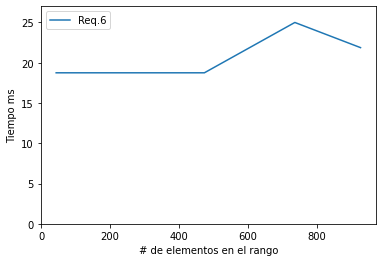

In [59]:
f1 = pruebaT.plot.line("pReq6", "Req.6")
f1.set_ylabel("Tiempo ms")
f1.set_xlabel("# de elementos en el rango")
f1.set_ylim((0,27))

Text(0.5, 0, '# de avistamiento')

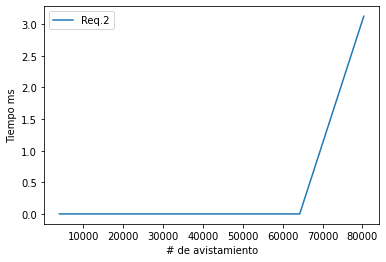

In [95]:
f2 = pruebaT.plot.line("NumDatos", "Req.2")
f2.set_ylabel("Tiempo ms")
f2.set_xlabel("# de avistamiento")

Text(0.5, 0, '# de avistamiento')

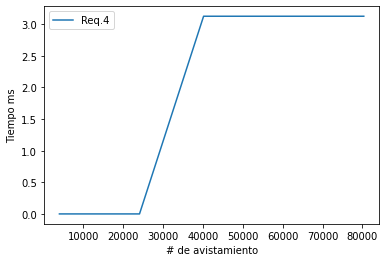

In [96]:
f3 = pruebaT.plot.line("NumDatos", "Req.4")
f3.set_ylabel("Tiempo ms")
f3.set_xlabel("# de avistamiento")

(0.0, 28.0)

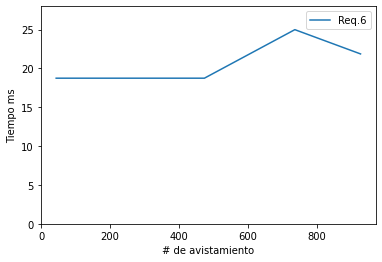

In [56]:
f4 = pruebaT.plot.line("pReq6", "Req.6")
f4.set_ylabel("Tiempo ms")
f4.set_xlabel("# de avistamiento")
f4.set_ylim((0,28))

In [3]:
import pandas as pd

In [6]:
df = pd.read_csv(r"C:\Users\camil\OneDrive\Desktop\Los Andes\5to Semestre\EDA\Retos\Reto3-G08\Data\UFOS\UFOS-utf8-large.csv")

df.groupby("city").city.count().sort_values()

city
&ccedil;anakkale (turkey)                         1
mt. morris township                               1
mt. orab                                          1
mt. palomar                                       1
mt. pleasant/texarkana (between&#44  on i30)      1
                                               ... 
los angeles                                     353
las vegas                                       368
portland                                        374
phoenix                                         454
seattle                                         525
Name: city, Length: 19900, dtype: int64

In [166]:
df = pd.read_csv(r"C:\Users\camil\OneDrive\Desktop\Los Andes\5to Semestre\EDA\Retos\Reto3-G08\Data\UFOS\UFOS-utf8-large.csv")
df["coord"] = df.apply(lambda x: (round(x.latitude,2), round(x.longitude,2)), axis=1)
df["latround"] =  df.latitude.apply(lambda x: round(x,2))
df["longround"] = df.longitude.apply(lambda x: round(x,2))
areq5 = df[df.coord.duplicated(keep=False)].sort_values(by="coord").iloc[:,[-3,-2,-1]]
elemlist = areq5.groupby("coord").coord.count().sort_values()
print(f"El maximo numero de elementos en una lista {elemlist.max()} y el minimo {elemlist.min()}")
print(f"Elementos en promedio {elemlist.mean()}")

nodsArbolLong = df.groupby(["latround"]).coord.count()
print(f"El numero maximo de nodos en un arbols de longitud es {nodsArbolLong.max()} y el minimo {nodsArbolLong.min()}")
print(f"En promedio el numero de nodos de los arboles de longitud es {nodsArbolLong.mean()}")

El maximo numero de elementos en una lista 584 y el minimo 2
Elementos en promedio 7.62916575909388
El numero maximo de nodos en un arbols de longitud es 666 y el minimo 1
En promedio el numero de nodos de los arboles de longitud es 20.90890161374284
